In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [ ]:
X, y = df.iloc[:,:-1],df.iloc[:,-1:]

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 20, n_estimators = 25)

In [ ]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=20, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=25, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=20, ...)

In [ ]:
preds = xg_reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, preds)
print("MSE: %f" % (mse))

MSE: 0.028130


In [ ]:
rmse_xg = np.sqrt(mse)
rmse_xg

0.16771993124105358

In [ ]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 5, 'alpha': 20}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [ ]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.327800,0.002052,0.328269,0.009530
1,0.309497,0.001948,0.310617,0.009520
2,0.293340,0.001911,0.294840,0.009906
3,0.278982,0.001979,0.281021,0.010318
4,0.266135,0.001744,0.268624,0.010714


In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.164314
Name: test-rmse-mean, dtype: float64


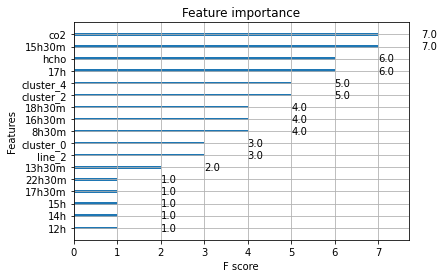

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [ ]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf

In [ ]:
from keras import models
from keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(208, 71) (208, 1)
(52, 71) (52, 1)


In [ ]:
import random
SEED = 2021
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)


In [ ]:
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X)

X_data_scaled[0]

array([0.42857143, 0.12962963, 0.30411449, 0.37974684, 0.22552255,
       0.36933045, 0.30314658, 0.23031826, 0.15958369, 0.18252934,
       0.16393443, 0.20700152, 0.18092567, 0.20648464, 0.21538462,
       0.1875    , 0.21089631, 0.17863105, 0.21087315, 0.14616322,
       0.14163614, 0.12406015, 0.14735658, 0.16685714, 0.14890017,
       0.14853195, 0.15801024, 0.10716872, 0.08676208, 0.08550186,
       0.07905138, 0.08165829, 0.06718925, 0.05792972, 0.05630252,
       0.05735141, 0.05479452, 0.06118547, 0.03631961, 0.0483871 ,
       0.66777963, 0.17507418, 0.17791411, 0.08333333, 0.        ,
       0.        , 1.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.96943231,
       0.51351351, 1.        , 0.02341787, 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y, test_size=0.2, shuffle=True, random_state = SEED)

In [ ]:
def build_model(num_input=1):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=num_input))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    return model

In [ ]:
model = build_model(num_input=71)

In [ ]:
model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=2)

Epoch 1/200
7/7 - 0s - loss: 0.0401 - mae: 0.1534 - 373ms/epoch - 53ms/step
Epoch 2/200
7/7 - 0s - loss: 0.0186 - mae: 0.1046 - 10ms/epoch - 1ms/step
Epoch 3/200
7/7 - 0s - loss: 0.0119 - mae: 0.0755 - 8ms/epoch - 1ms/step
Epoch 4/200
7/7 - 0s - loss: 0.0088 - mae: 0.0689 - 8ms/epoch - 1ms/step
Epoch 5/200
7/7 - 0s - loss: 0.0074 - mae: 0.0617 - 9ms/epoch - 1ms/step
Epoch 6/200
7/7 - 0s - loss: 0.0057 - mae: 0.0547 - 11ms/epoch - 2ms/step
Epoch 7/200
7/7 - 0s - loss: 0.0052 - mae: 0.0524 - 10ms/epoch - 1ms/step
Epoch 8/200
7/7 - 0s - loss: 0.0045 - mae: 0.0481 - 10ms/epoch - 1ms/step
Epoch 9/200
7/7 - 0s - loss: 0.0042 - mae: 0.0467 - 9ms/epoch - 1ms/step
Epoch 10/200
7/7 - 0s - loss: 0.0037 - mae: 0.0430 - 8ms/epoch - 1ms/step
Epoch 11/200
7/7 - 0s - loss: 0.0034 - mae: 0.0408 - 8ms/epoch - 1ms/step
Epoch 12/200
7/7 - 0s - loss: 0.0031 - mae: 0.0384 - 8ms/epoch - 1ms/step
Epoch 13/200
7/7 - 0s - loss: 0.0032 - mae: 0.0383 - 8ms/epoch - 1ms/step
Epoch 14/200
7/7 - 0s - loss: 0.0030 - m

7/7 - 0s - loss: 1.5173e-05 - mae: 0.0028 - 8ms/epoch - 1ms/step
Epoch 108/200
7/7 - 0s - loss: 1.1579e-05 - mae: 0.0026 - 9ms/epoch - 1ms/step
Epoch 109/200
7/7 - 0s - loss: 9.1854e-06 - mae: 0.0023 - 9ms/epoch - 1ms/step
Epoch 110/200
7/7 - 0s - loss: 1.1637e-05 - mae: 0.0025 - 8ms/epoch - 1ms/step
Epoch 111/200
7/7 - 0s - loss: 1.2046e-05 - mae: 0.0025 - 8ms/epoch - 1ms/step
Epoch 112/200
7/7 - 0s - loss: 1.6011e-05 - mae: 0.0029 - 8ms/epoch - 1ms/step
Epoch 113/200
7/7 - 0s - loss: 1.5743e-05 - mae: 0.0029 - 8ms/epoch - 1ms/step
Epoch 114/200
7/7 - 0s - loss: 2.1269e-05 - mae: 0.0034 - 8ms/epoch - 1ms/step
Epoch 115/200
7/7 - 0s - loss: 3.1003e-05 - mae: 0.0040 - 8ms/epoch - 1ms/step
Epoch 116/200
7/7 - 0s - loss: 3.2490e-05 - mae: 0.0042 - 8ms/epoch - 1ms/step
Epoch 117/200
7/7 - 0s - loss: 3.2203e-05 - mae: 0.0043 - 7ms/epoch - 997us/step
Epoch 118/200
7/7 - 0s - loss: 4.0660e-05 - mae: 0.0046 - 8ms/epoch - 1ms/step
Epoch 119/200
7/7 - 0s - loss: 4.2194e-05 - mae: 0.0049 - 8ms/ep

In [ ]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0085 - mae: 0.0671


[0.008547959849238396, 0.06713148951530457]

In [ ]:
model = build_model(num_input=71)
history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.25, verbose=2)

Epoch 1/200
5/5 - 0s - loss: 0.0287 - mae: 0.1202 - val_loss: 0.0138 - val_mae: 0.0919 - 409ms/epoch - 82ms/step
Epoch 2/200
5/5 - 0s - loss: 0.0206 - mae: 0.1075 - val_loss: 0.0125 - val_mae: 0.0933 - 24ms/epoch - 5ms/step
Epoch 3/200
5/5 - 0s - loss: 0.0142 - mae: 0.0804 - val_loss: 0.0097 - val_mae: 0.0682 - 22ms/epoch - 4ms/step
Epoch 4/200
5/5 - 0s - loss: 0.0120 - mae: 0.0751 - val_loss: 0.0094 - val_mae: 0.0754 - 23ms/epoch - 5ms/step
Epoch 5/200
5/5 - 0s - loss: 0.0102 - mae: 0.0745 - val_loss: 0.0081 - val_mae: 0.0650 - 23ms/epoch - 5ms/step
Epoch 6/200
5/5 - 0s - loss: 0.0087 - mae: 0.0637 - val_loss: 0.0084 - val_mae: 0.0651 - 25ms/epoch - 5ms/step
Epoch 7/200
5/5 - 0s - loss: 0.0069 - mae: 0.0585 - val_loss: 0.0088 - val_mae: 0.0726 - 23ms/epoch - 5ms/step
Epoch 8/200
5/5 - 0s - loss: 0.0059 - mae: 0.0577 - val_loss: 0.0077 - val_mae: 0.0665 - 23ms/epoch - 5ms/step
Epoch 9/200
5/5 - 0s - loss: 0.0059 - mae: 0.0543 - val_loss: 0.0079 - val_mae: 0.0677 - 23ms/epoch - 5ms/step

Epoch 73/200
5/5 - 0s - loss: 2.6988e-06 - mae: 0.0012 - val_loss: 0.0068 - val_mae: 0.0612 - 24ms/epoch - 5ms/step
Epoch 74/200
5/5 - 0s - loss: 2.6525e-06 - mae: 0.0012 - val_loss: 0.0068 - val_mae: 0.0613 - 23ms/epoch - 5ms/step
Epoch 75/200
5/5 - 0s - loss: 2.3039e-06 - mae: 0.0012 - val_loss: 0.0068 - val_mae: 0.0611 - 24ms/epoch - 5ms/step
Epoch 76/200
5/5 - 0s - loss: 1.8750e-06 - mae: 0.0010 - val_loss: 0.0068 - val_mae: 0.0611 - 23ms/epoch - 5ms/step
Epoch 77/200
5/5 - 0s - loss: 1.2612e-06 - mae: 7.8812e-04 - val_loss: 0.0068 - val_mae: 0.0613 - 22ms/epoch - 4ms/step
Epoch 78/200
5/5 - 0s - loss: 1.5810e-06 - mae: 9.5008e-04 - val_loss: 0.0068 - val_mae: 0.0612 - 22ms/epoch - 4ms/step
Epoch 79/200
5/5 - 0s - loss: 1.2939e-06 - mae: 8.3640e-04 - val_loss: 0.0068 - val_mae: 0.0612 - 23ms/epoch - 5ms/step
Epoch 80/200
5/5 - 0s - loss: 1.2856e-06 - mae: 8.0705e-04 - val_loss: 0.0068 - val_mae: 0.0612 - 24ms/epoch - 5ms/step
Epoch 81/200
5/5 - 0s - loss: 1.8871e-06 - mae: 0.0011 -

Epoch 143/200
5/5 - 0s - loss: 3.9582e-06 - mae: 0.0014 - val_loss: 0.0068 - val_mae: 0.0612 - 24ms/epoch - 5ms/step
Epoch 144/200
5/5 - 0s - loss: 7.1499e-06 - mae: 0.0021 - val_loss: 0.0068 - val_mae: 0.0616 - 25ms/epoch - 5ms/step
Epoch 145/200
5/5 - 0s - loss: 1.2601e-05 - mae: 0.0025 - val_loss: 0.0068 - val_mae: 0.0611 - 24ms/epoch - 5ms/step
Epoch 146/200
5/5 - 0s - loss: 1.1182e-05 - mae: 0.0024 - val_loss: 0.0068 - val_mae: 0.0613 - 24ms/epoch - 5ms/step
Epoch 147/200
5/5 - 0s - loss: 8.9600e-06 - mae: 0.0022 - val_loss: 0.0070 - val_mae: 0.0617 - 24ms/epoch - 5ms/step
Epoch 148/200
5/5 - 0s - loss: 9.0604e-06 - mae: 0.0023 - val_loss: 0.0068 - val_mae: 0.0608 - 24ms/epoch - 5ms/step
Epoch 149/200
5/5 - 0s - loss: 7.3962e-06 - mae: 0.0021 - val_loss: 0.0069 - val_mae: 0.0617 - 25ms/epoch - 5ms/step
Epoch 150/200
5/5 - 0s - loss: 1.8548e-05 - mae: 0.0030 - val_loss: 0.0067 - val_mae: 0.0610 - 23ms/epoch - 5ms/step
Epoch 151/200
5/5 - 0s - loss: 2.9516e-05 - mae: 0.0041 - val_lo

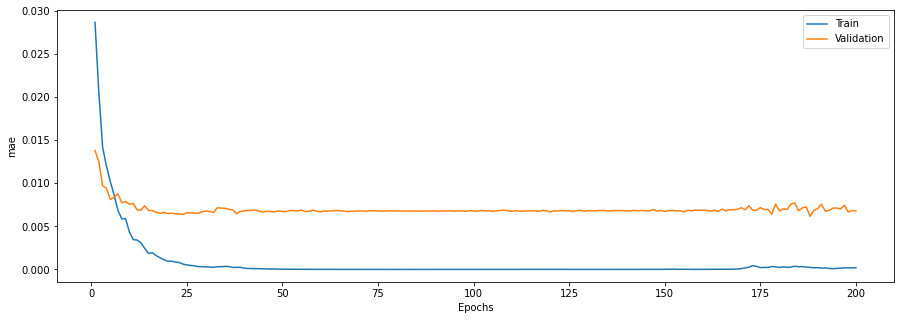

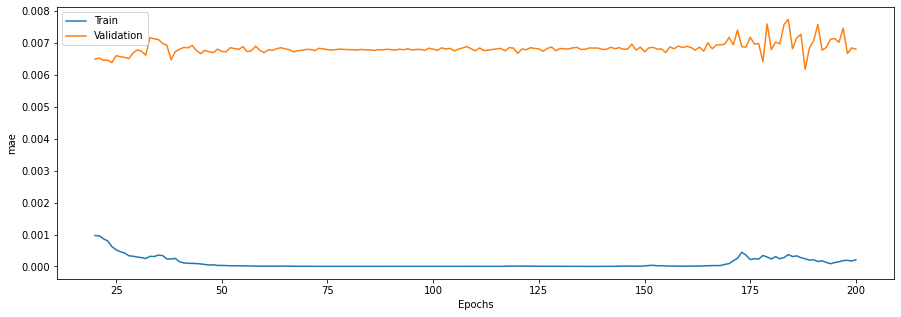

In [ ]:
def plot_loss_curve(total_epoch=10, start=1):
    plt.figure(figsize=(15, 5))
    plt.plot(range(start, total_epoch +1), history.history['loss'][start-1:total_epoch], label='Train')
    plt.plot(range(start, total_epoch +1), history.history['val_loss'][start-1:total_epoch], label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('mse')
    plt.legend()
    plt.show()
    
plot_loss_curve(total_epoch=200, start=1)

plot_loss_curve(total_epoch=200, start=20)

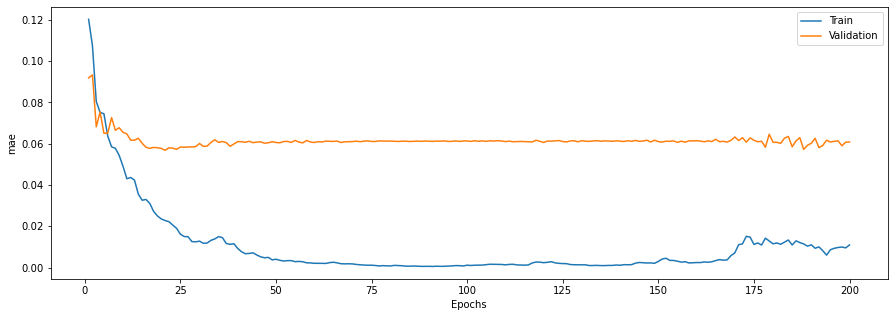

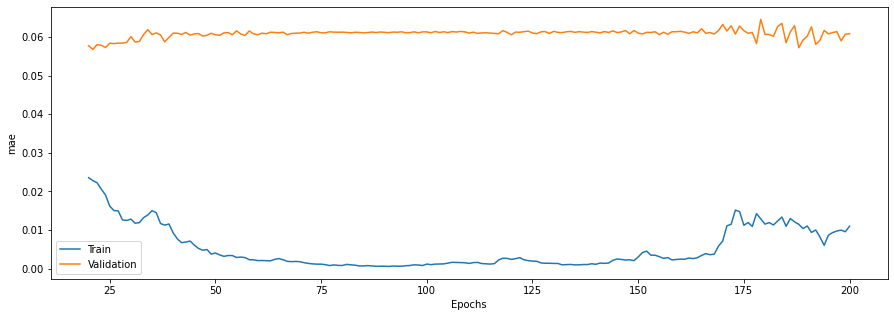

In [ ]:
def plot_loss_curve1(total_epoch=10, start=1):
    plt.figure(figsize=(15, 5))
    plt.plot(range(start, total_epoch +1), history.history['mae'][start-1:total_epoch], label='Train')
    plt.plot(range(start, total_epoch +1), history.history['val_mae'][start-1:total_epoch], label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('mae')
    plt.legend()
    plt.show()
    
plot_loss_curve1(total_epoch=200, start=1)

plot_loss_curve1(total_epoch=200, start=20)

In [ ]:
mse_DNN = 0.008547959849238396
rmse_DNN = np.sqrt(mse_DNN)
rmse_DNN

0.09245517751450373

In [ ]:
mse_RF = 0.08680816532667182
rmse_RF = np.sqrt(mse_RF)
rmse_RF

0.29463225438955565

In [ ]:
mse_R = 0.12210746349388453
rmse_R = np.sqrt(mse_R)
rmse_R

0.3494387836143615

In [ ]:
rmse_XG = 0.164314
rmse_XG

0.164314